# Student Perfromance Indicator 

## Life Cycle of a Machine Learning Project 

- Understanding the problem Statement 
- Data Collection 
- Data Checks to perform 
- EDA
- Data Pre-processing 
- Model Training 
- Choose best Model

##### 1) Problem Statement 
- This Project understands how the student's perfromance(test_scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

##### 2) Data Collection 

- Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetID=74977
- Data Consists of 8 columns and 1000 rows 



##### 3) Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib,Seaborn and Warnings Library 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')


##### Import the CSV DATA as pandas DataFrame

In [5]:
df = pd.read_csv('data/StudentsPerformance.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/StudentsPerformance.csv'

In [6]:
import os
print(os.getcwd())

/Users/venkatshreenidhir/Desktop/Project Development /notebook/data


In [13]:
df = pd.read_csv('/Users/venkatshreenidhir/Desktop/Project Development /notebook/data/StudentsPerformance.csv')

# if error persists, copy the path from actual file location

##### Top 5 records 

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of the dataset 


In [16]:
df.shape

(1000, 8)

##### Dataset Information 

- Gender: sex of students -> (Male/Female)
- race/ethnicity: ethnicity of students -> (Group A,B,C,D,E)
- Parental Level of Education: Parents' Final Education -> (Bachelor's degree, some college, master's degree, associate's degree, high school )
- Lunch: Having lunch before test(Standard or Free/reduced)
- Test Preparation course: complete or not complete before test 
- math score 
- reading score 
- writing score 

##### Data Checks to perform 

- Check Missing Values 
- Check Duplicates 
- Check data type 
- Check the number of unique values of each column 
- Check statistics of data set 
- Check various categories present in the different categorical column 

In [17]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### There are no missing values in the data set 

##### Check duplicates 

In [19]:
print(df.duplicated().sum())

0


There are no duplicate values in the dataset 

##### Check Data types 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Checking the number of unique values of each column 

In [21]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### Statistics of the Data Set

In [22]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight

- From above description of numerical data, all means are very close to each other - between 66 and 68.05 
- All Standard Deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math score, for writing minimum is much higher = 10
and for reading much higher = 17 

##### Exploring Data 

Unique values in every category

In [30]:
print("Categories in 'gender' variable:     ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:     ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:     ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparatin_course' variable:     ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test_preparatin_course' variable:      ['none' 'completed']


In [31]:
### Spilitting into numerical and categorical columns 
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print those columns 

print('we have {} numerical features :{}'.format(len(numeric_features),numeric_features))
print('we have {} categorical features :{}'.format(len(categorical_features),categorical_features))

we have 3 numerical features :['math score', 'reading score', 'writing score']
we have 5 categorical features :['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


##### Adding columns for "Total Score" and "Average"

In [36]:
df['Total_score']= df['math score']+ df['writing score']+df['reading score']
df['Average'] = df['Total_score']/3


In [37]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Avergae,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


In [38]:
reading_full = df[df['reading score']==100]['Average'].count()
writing_full = df[df['writing score']==100]['Average'].count()
math_full = df[df['math score']==100]['Average'].count()

print(f"Number of students with Full marks in Maths: {math_full}")
print(f"Number of students with Full marks in writing: {writing_full}")
print(f"Number of students with Full marks in reading: {reading_full}")

Number of students with Full marks in Maths: 7
Number of students with Full marks in writing: 14
Number of students with Full marks in reading: 17


In [39]:
reading_less_20 = df[df['reading score']<=20]['Average'].count()
writing_less_20 = df[df['writing score']<=20]['Average'].count()
math_less_20 = df[df['math score']<=20]['Average'].count()

print(f"Number of students with less than 20 marks in Maths: {math_less_20}")
print(f"Number of students with less than 20 marks  in writing: {writing_less_20}")
print(f"Number of students with less than 20 marks  in reading: {reading_less_20}")

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks  in writing: 3
Number of students with less than 20 marks  in reading: 1


##### Insights 

- From above values we get students have performed the worst in Maths 
- Best performance is in reading section 

##### Exploring Data (Visualization)

##### Visualize Average score distribution to make some conclusion.

- Histogram 
- Kernel Distribution Function (KDE)

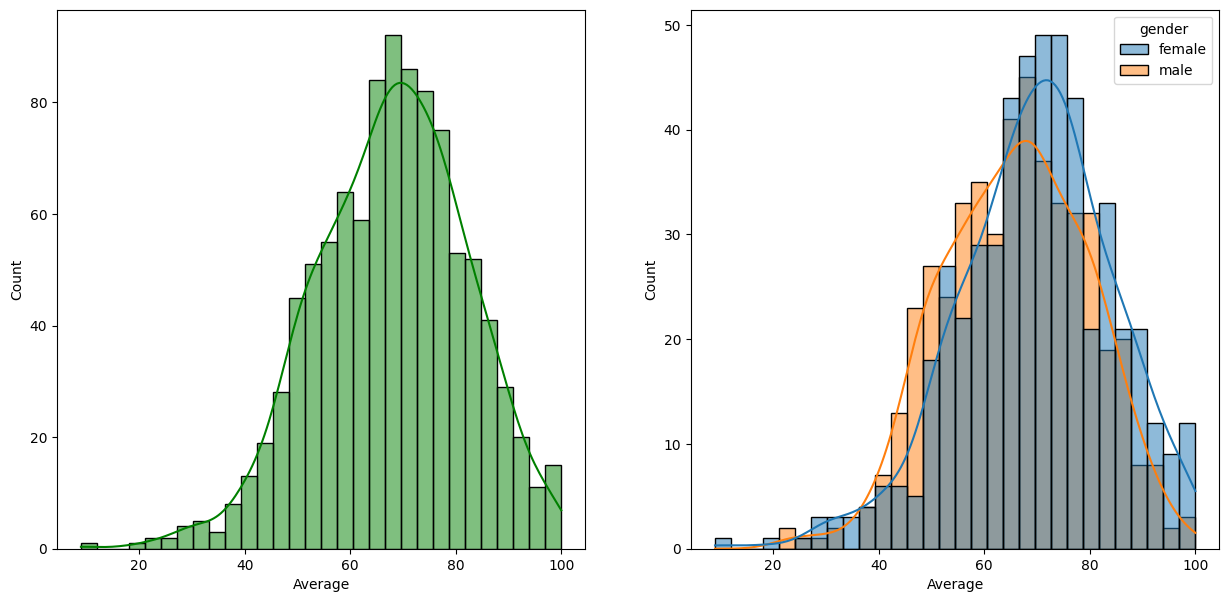

In [43]:
fig, axes= plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins =30, kde=True,color ='g')
plt.subplot(122)
sns.histplot(data=df, x='Average', bins =30, kde=True,hue = 'gender')
plt.show()

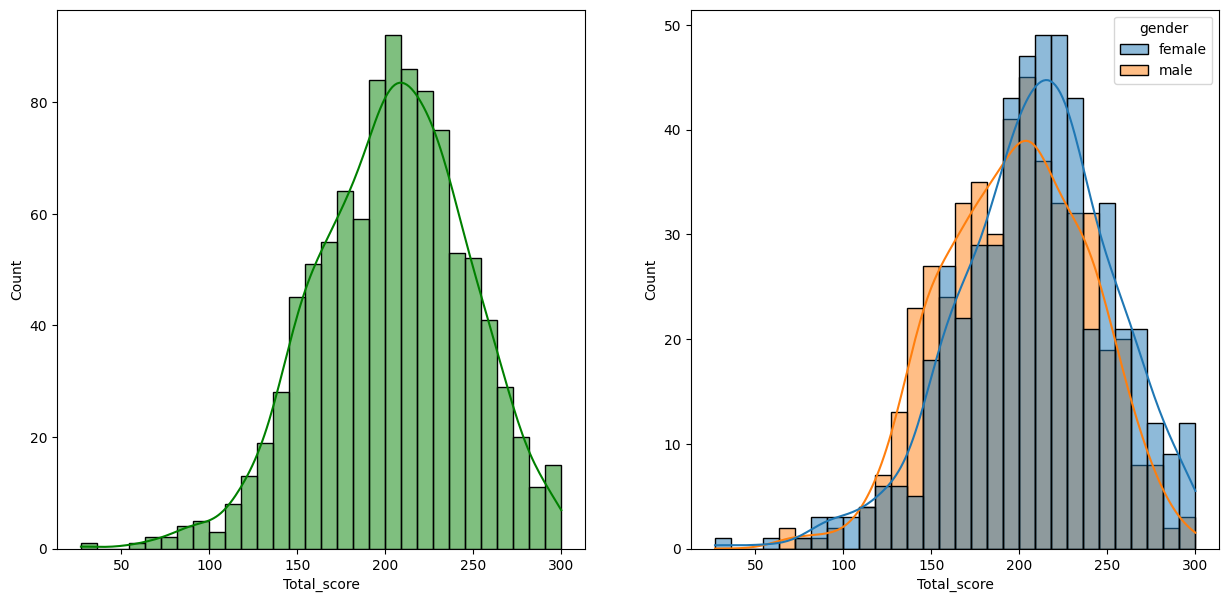

In [44]:
fig, axes= plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x='Total_score', bins =30, kde=True,color ='g')
plt.subplot(122)
sns.histplot(data=df, x='Total_score', bins =30, kde=True,hue = 'gender')
plt.show()